In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter,filtfilt
from scipy.signal import find_peaks

In [63]:
df = pd.read_excel('dataset/data.xls')
df.rename(columns={
    'Linear Acceleration x (m/s^2)' :'Ax',
    'Linear Acceleration y (m/s^2)':'Ay',
    'Linear Acceleration z (m/s^2)':'Az',
    }, inplace=True)
df = df.set_index('Time (s)')

In [64]:
df.sample(5)

,Ax,Ay,Az
Time (s),,,
49.345930,0.011401,-0.040462,0.089136
14.366906,-0.023406,0.057138,-0.041170
18.151905,-0.026594,0.013749,-0.074378
42.612386,-0.013891,-0.001341,0.010615
40.767316,0.031021,-0.037116,-0.036737


In [65]:
df_direct = df
# membuat starting point yang sama 
n = len(df)
df_direct['Ax'] = df_direct['Ax'] - (sum(df_direct['Ax'])/n)
df_direct['Ay'] = df_direct['Ay'] - (sum(df_direct['Ay'])/n)
df_direct['Az'] = df_direct['Az'] - (sum(df_direct['Az'])/n)

In [66]:
df_direct.sample(5)

,Ax,Ay,Az
Time (s),,,
0.862708,-0.006644,-0.083408,0.036527
9.916208,0.001795,-0.041071,-0.014102
61.804895,0.014938,-0.037146,-0.067715
59.113372,-0.017868,-0.116245,0.038359
31.998600,-0.028412,0.001016,-0.048376


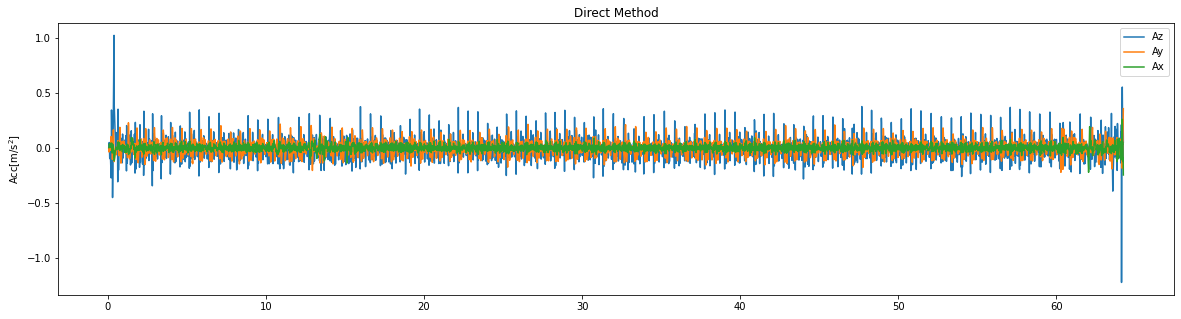

In [80]:
plt.figure(figsize=(20,5))
data_column = ['Az','Ay','Ax']
for col in data_column:
  plt.plot(df_direct.index,df_direct[col],label=col)
plt.title('Direct Method')
plt.ylabel('Acc[$\mathregular{m/s^{2}}$]')
plt.legend()
plt.show()

In [69]:
df_inklinasi = df_direct

In [70]:
rho = np.arctan(df['Ax']/(np.sqrt(df['Ay']**2+df['Ay']**2)))

In [71]:
result = pd.DataFrame(rho, columns=['rho'])

In [72]:
result.sample(5)

,rho
Time (s),
8.023715,-0.167429
55.974855,-0.029969
28.508354,0.169434
59.550863,0.408023
59.855205,-0.439978


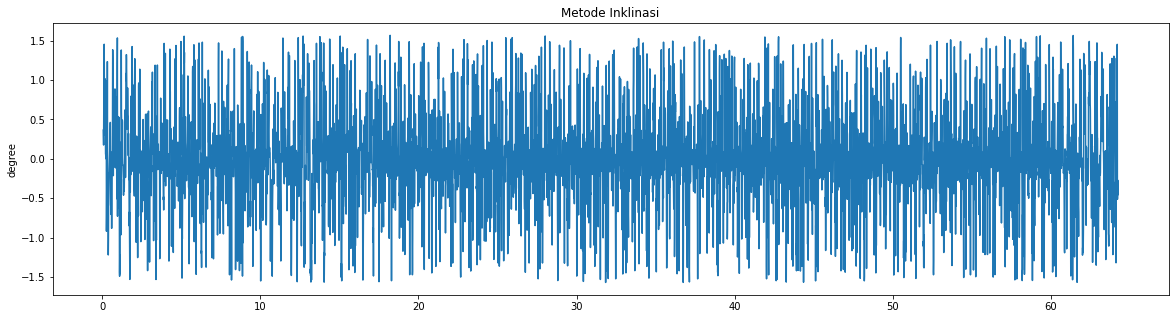

In [83]:
plt.figure(figsize=(20,5))
plt.title('Metode Inklinasi')
plt.plot(result)
plt.ylabel('degree')
plt.show()

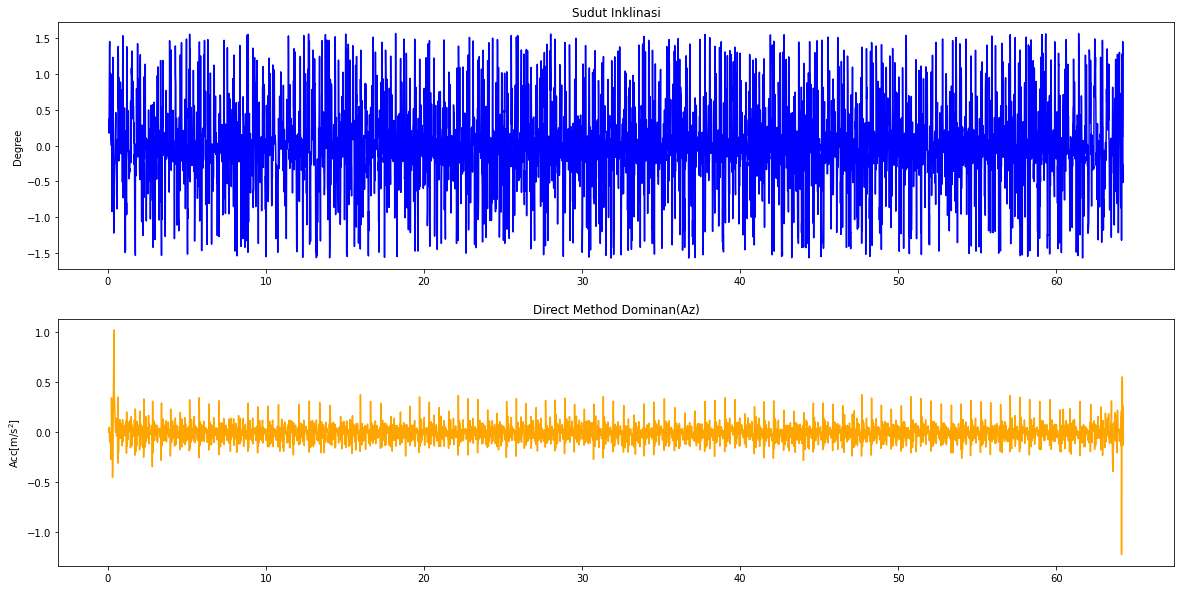

In [84]:
fig,ax = plt.subplots(2,1,figsize=(20,10))
ax[0].set_title("Sudut Inklinasi")
ax[0].plot(result, "blue")
ax[0].set_ylabel('Degree')
ax[1].set_title("Direct Method Dominan(Az)")
ax[1].plot(df_direct['Az'], "orange")
ax[1].set_ylabel('Acc[$\mathregular{m/s^{2}}$]')
plt.show()

In [75]:
def butter_lowpass(data,cutoff,Fs,order):
  nyq=0.5 * Fs
  normal_cutoff = cutoff/nyq
  b, a = butter(order, normal_cutoff, btype='low', analog=False)
  y = filtfilt(b, a,data,axis=0)
  return y

In [76]:
T = 60.0
Fs = 100 # Sample rate
cutoff = 0.8 
order = 5
n =  int(T* Fs) # Jumlah Sample

In [77]:
direct_lpf = butter_lowpass(df_direct['Az'], cutoff, Fs, order)
inklinasi_lpf= butter_lowpass(result['rho'], cutoff, Fs, order)

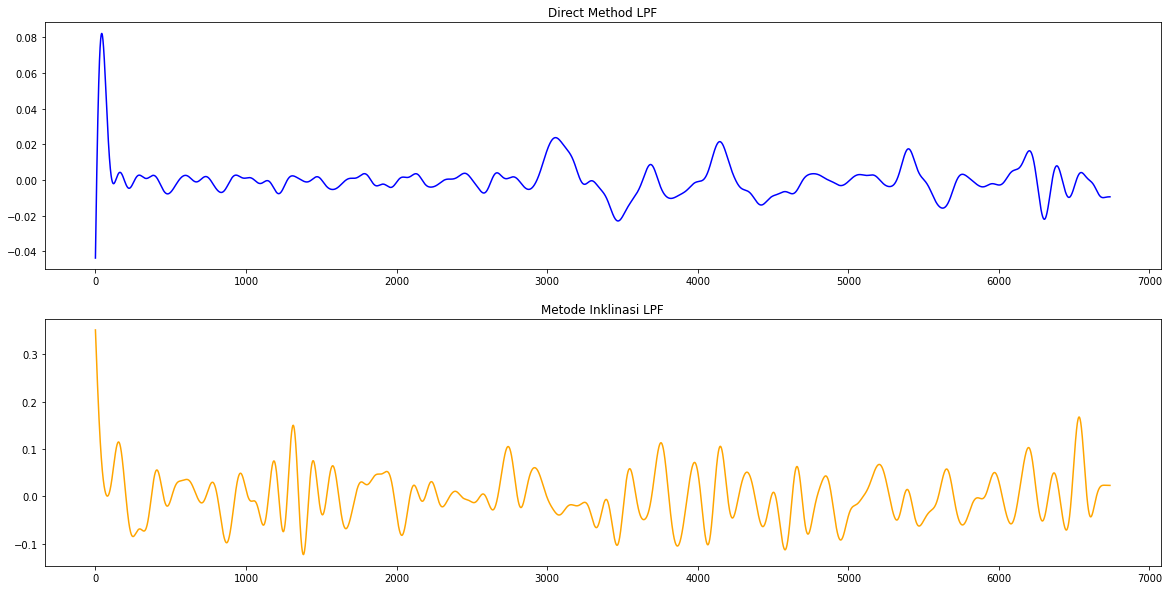

In [85]:
fig,ax = plt.subplots(2,1,figsize=(20,10))
ax[0].set_title('Direct Method LPF')
ax[0].plot(direct_lpf, "blue")
ax[1].set_title('Metode Inklinasi LPF')
ax[1].plot(inklinasi_lpf,"orange")
plt.show()